In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [16]:
# Load iris data
iris = load_iris()
X = iris.data          # features
y = iris.target        # labels
feature_names = iris.feature_names

In [18]:
# get the shape of dataset
print(X.shape)

(150, 4)


In [19]:
#standardize the dataset
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_stdzd = (X - X_mean) / X_std

In [22]:
cov_matrix = np.cov(X_stdzd.T)
print(cov_matrix)

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [23]:
# Obtain Eigenvalues & Eigenvectors
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print(f"Eigen Values: {eig_vals}")
print(f"Eighen Vectors: {eig_vecs}")

Eigen Values: [2.93808505 0.9201649  0.14774182 0.02085386]
Eighen Vectors: [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [24]:
# Sort eigenvalues & eigenvectors
sorted_idx = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[sorted_idx]
eig_vecs = eig_vecs[:, sorted_idx]

In [25]:
# Obtain the explained variance by each component
total_variance = np.sum(eig_vals)
explained_variance = eig_vals
explained_variance_ratio = eig_vals / total_variance
cumulative_variance = np.cumsum(explained_variance_ratio)

print("Eigenvalues (Variance per PC):")
print(explained_variance)

print("\nExplained Variance Ratio:")
print(explained_variance_ratio)

print("\nCumulative Explained Variance:")
print(cumulative_variance)

Eigenvalues (Variance per PC):
[2.93808505 0.9201649  0.14774182 0.02085386]

Explained Variance Ratio:
[0.72962445 0.22850762 0.03668922 0.00517871]

Cumulative Explained Variance:
[0.72962445 0.95813207 0.99482129 1.        ]


([<matplotlib.axis.XTick at 0x7ff8813df8c0>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4')])

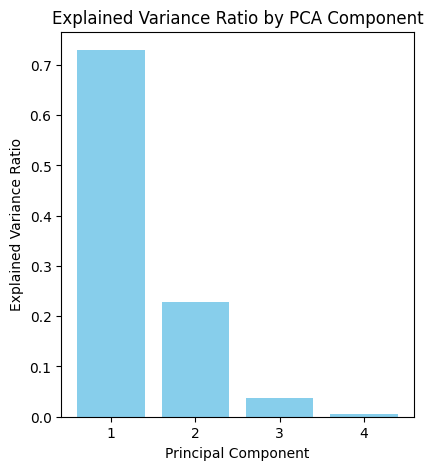

In [26]:
# Plot explained variance
plt.figure(figsize=(10,5))

# Bar chart for explained variance ratio
plt.subplot(1, 2, 1)
plt.bar(range(1, 5), explained_variance_ratio, color='skyblue')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance Ratio by PCA Component")
plt.xticks([1,2,3,4])

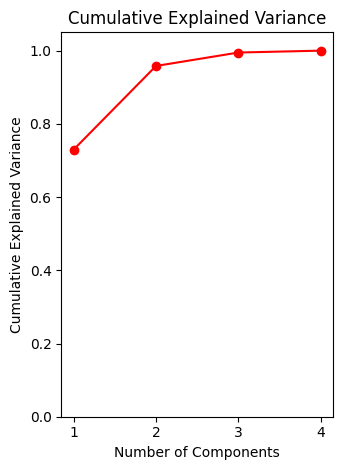

In [27]:
# Line chart for cumulative explained variance
plt.subplot(1, 2, 2)
plt.plot(range(1, 5), cumulative_variance, marker='o', color='red')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance")
plt.xticks([1,2,3,4])
plt.ylim(0, 1.05)

plt.tight_layout()
plt.show()

In [28]:
W = eig_vecs[:, :2]
X_pca = X_stdzd.dot(W)

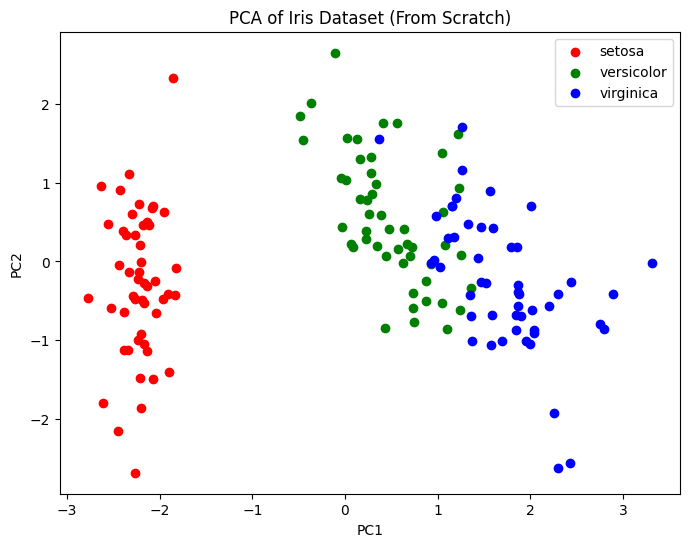

In [29]:
# 9. Plot PCA result
plt.figure(figsize=(8,6))
colors = ['red', 'green', 'blue']

for label, color in zip([0,1,2], colors):
    plt.scatter(X_pca[y==label, 0],
                X_pca[y==label, 1],
                c=color,
                label=iris.target_names[label])

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of Iris Dataset (From Scratch)")
plt.legend()
plt.show()